# This is a script for batch run 

Data length (number of rows): 180
INLET_TEMPERATURE shape: (180, 10)
SERVER_TEMPERATURE shape: (180, 10)
OUTLET_TEMPERATURE shape: (180, 10)
RCU_TEMPERATURE shape: (180,)
SERVER_POWER shape: (180, 10)
INLET_TEMPERATURE shape: (180, 10)
Xmeas shape: (30, 180)
INLET_TEMPERATURE.shape[0] 180
Eigenvalues of the discrete system: [1.83670992e-40 1.49168444e-24 1.83670992e-40 1.49168444e-24]
The discrete-time system (A_dis) is stable.
System defined and saved for Simulink.
Eigenvalues of continuous system: [-0.01523948 -0.18145878 -0.01523948 -0.18145878]
Eigenvalues of discrete system: [1.83670992e-40 1.49168444e-24 1.83670992e-40 1.49168444e-24]
Eigenvalues of augmented system: [1.83670992e-40 1.49168444e-24 1.83670992e-40 1.49168444e-24
 9.99000000e-01 1.00000000e+00]
The discrete-time system is stable.
total simulation step 50


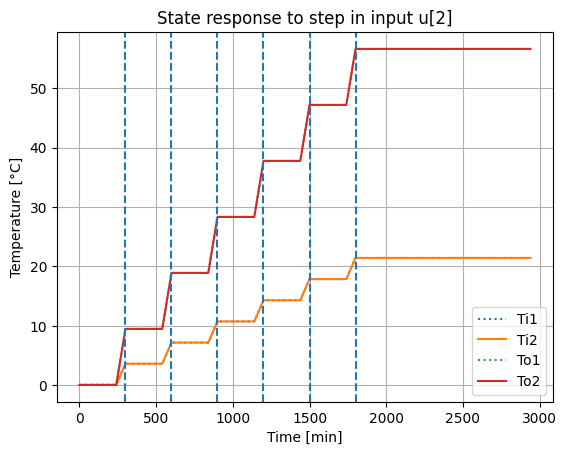

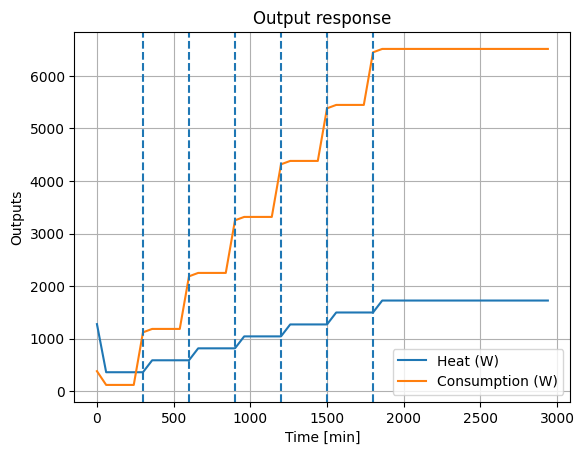

len t_hr  24
len T_cell  24
length  24


c:\Users\s2748442\OneDrive - University of Edinburgh\RA-repo\MSc_stage1_cleaned.py:303: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range('2022-01-01', '2022-12-31 23:00', freq='1H', tz=tz)     # Time range


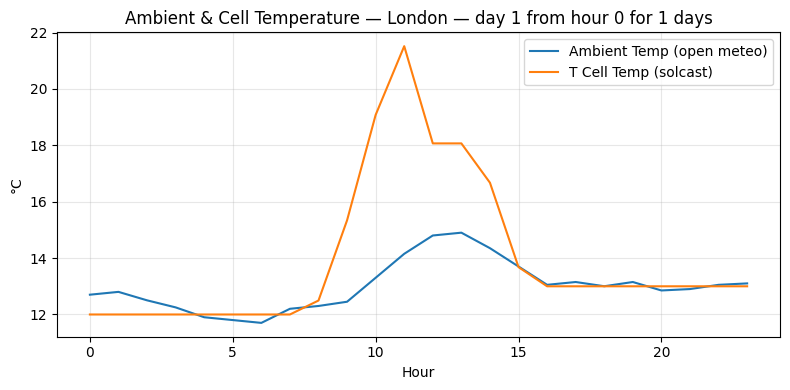

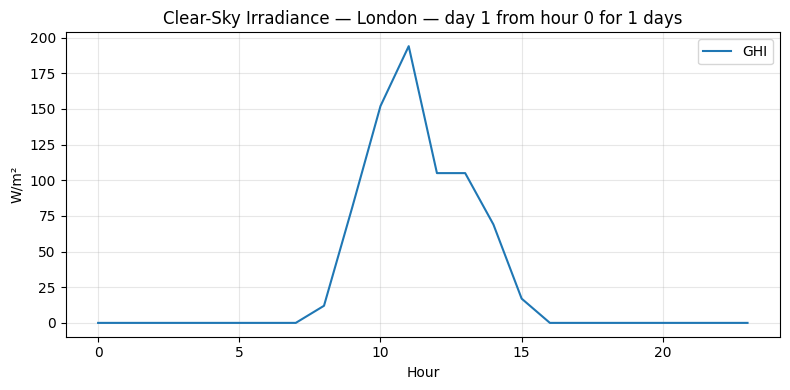

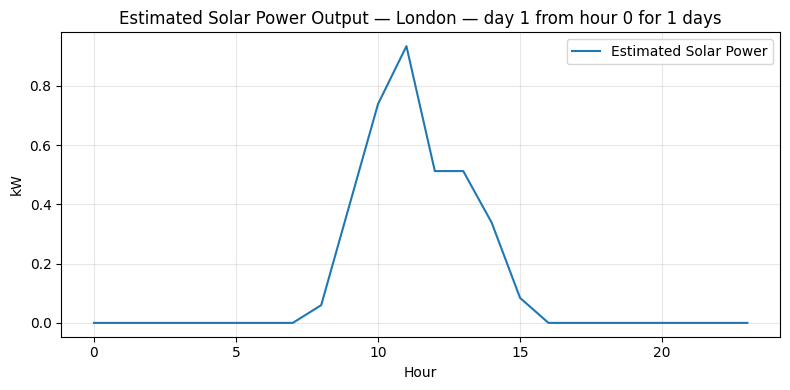

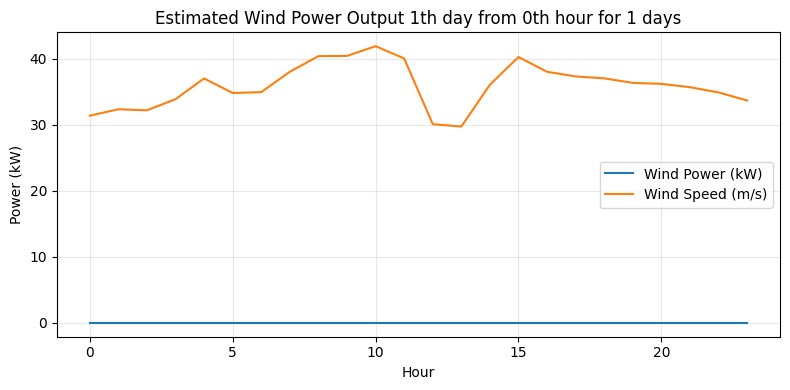

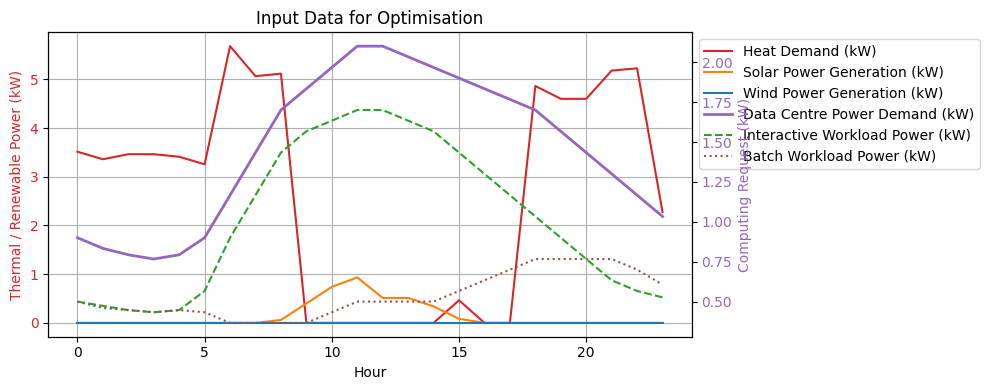

Total Batch Workload (FLOPH): 7870
Average Batch Workload (FLOPH): 327.9167
Data Centre Anticipated Maximum Server Consumption (kW): 2.1377
Objective type selected: Multi-objective
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2712303
Academic license 2712303 - for non-commercial use only - registered to wl___@ed.ac.uk
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Set parameter InfUnbdInfo to value 1
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-14700, instruction set [SSE2|AVX|AVX2]
Thread count: 20 physical cores, 28 logical processors, using up to 28 threads

Non-default parameters:
InfUnbdInfo  1

Academic license 2712303 - for non-commercial use only - registered to wl___@ed.ac.uk
Optimize a model with 1030 rows, 672 columns and 3085 nonzeros
Model fingerprint: 0xb7d59e05
Model has 46 quadratic constraints
Variable types: 624 continuous, 48 inte

<Figure size 640x480 with 0 Axes>

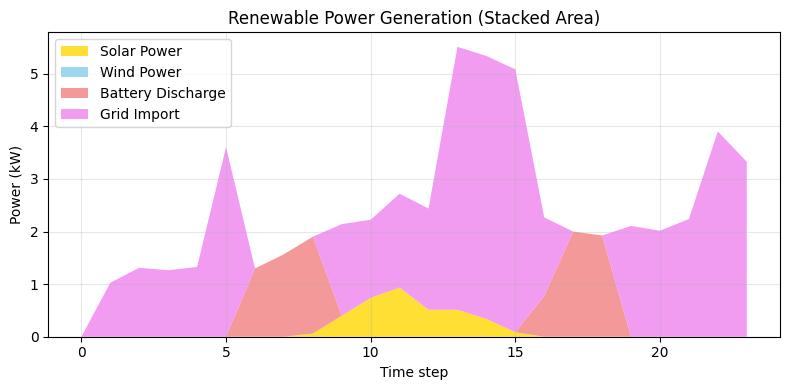

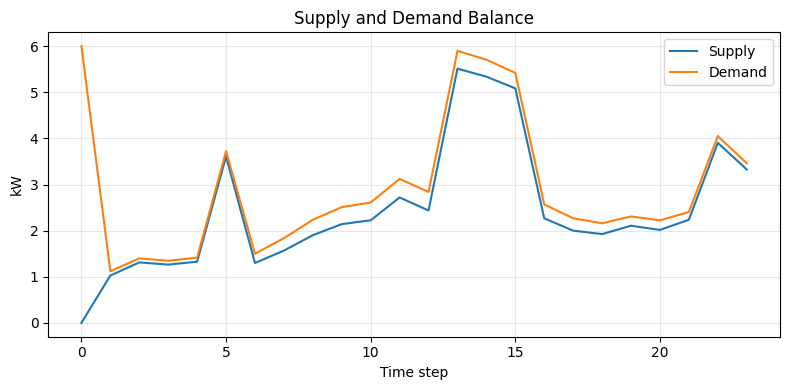

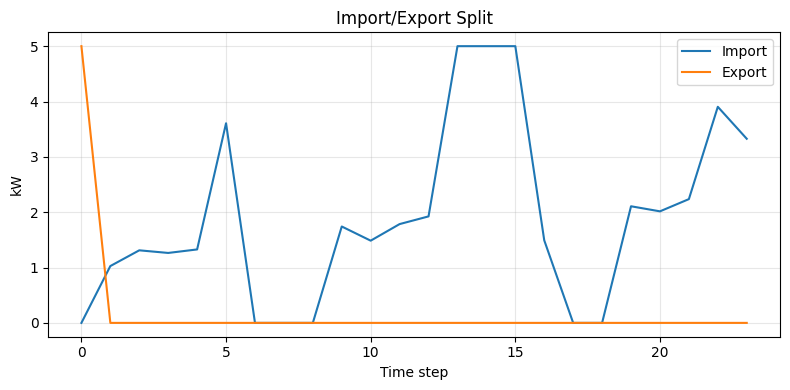

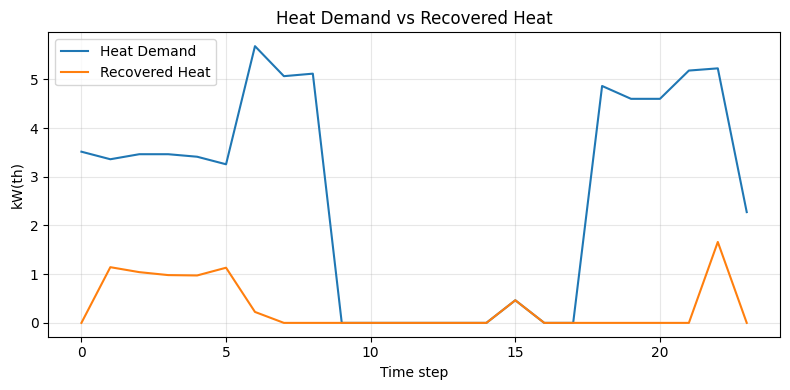

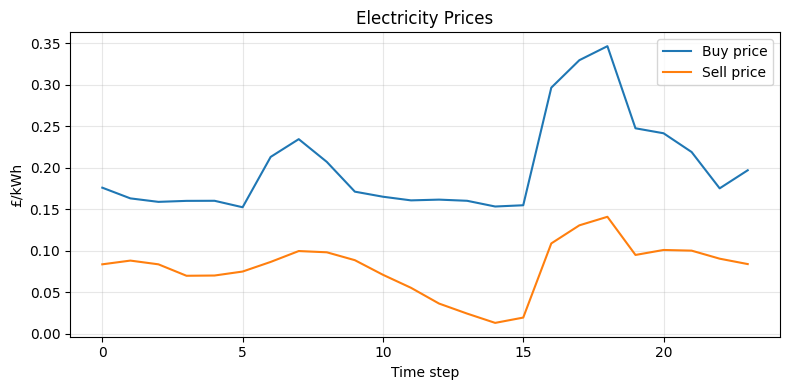

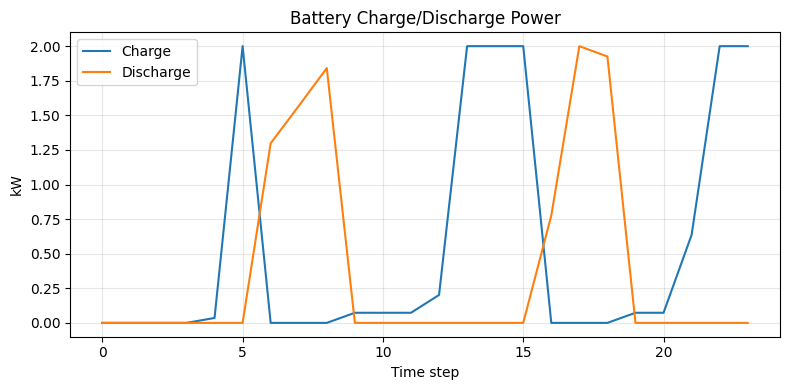

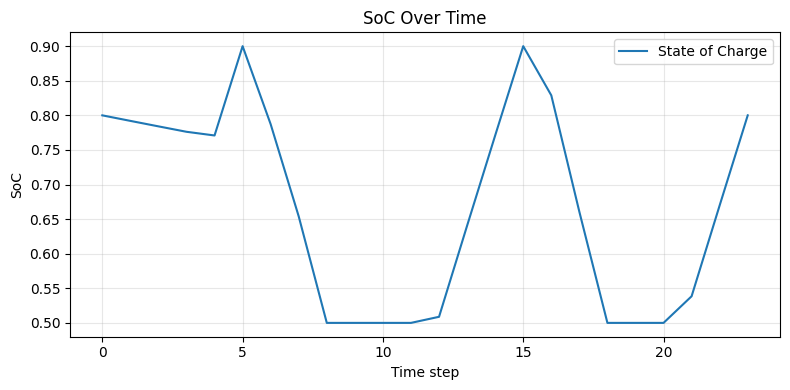

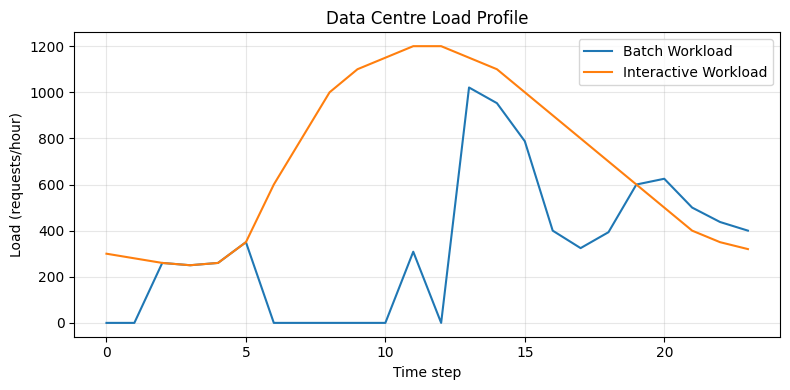

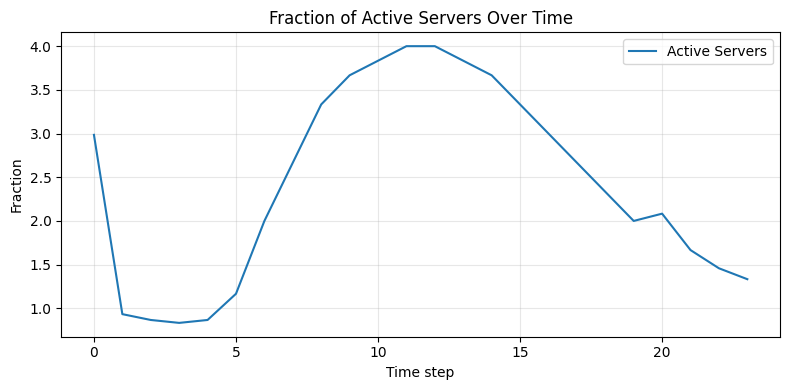

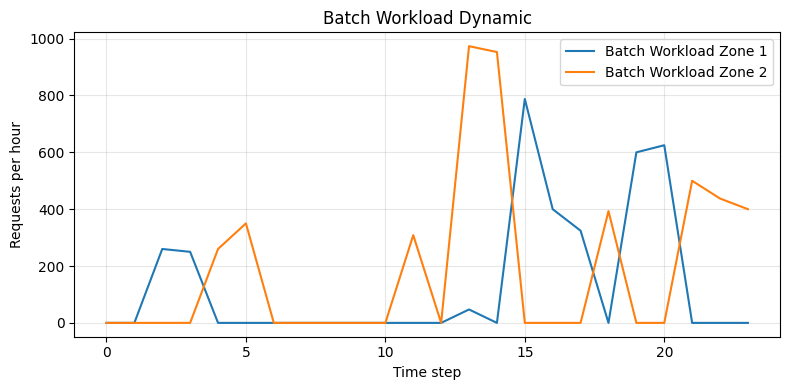

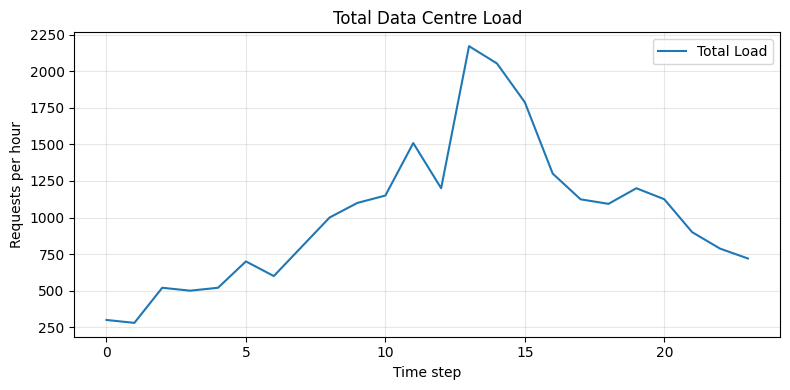

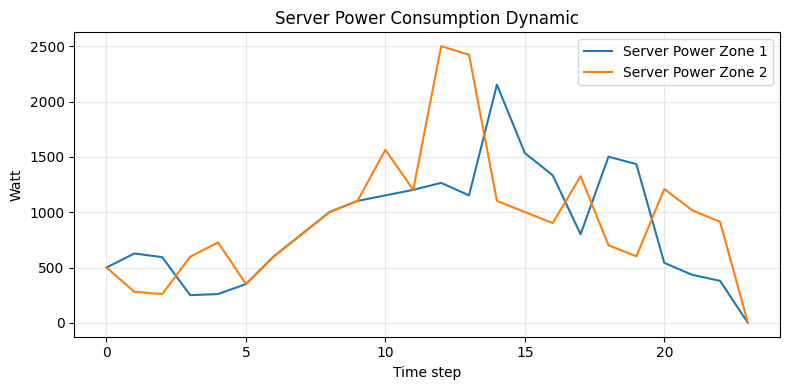

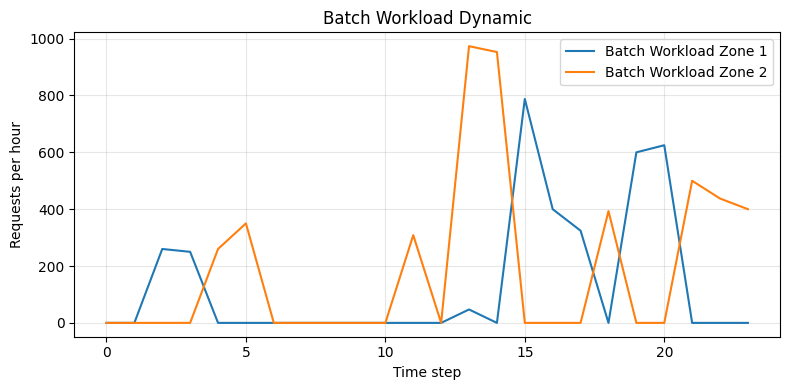

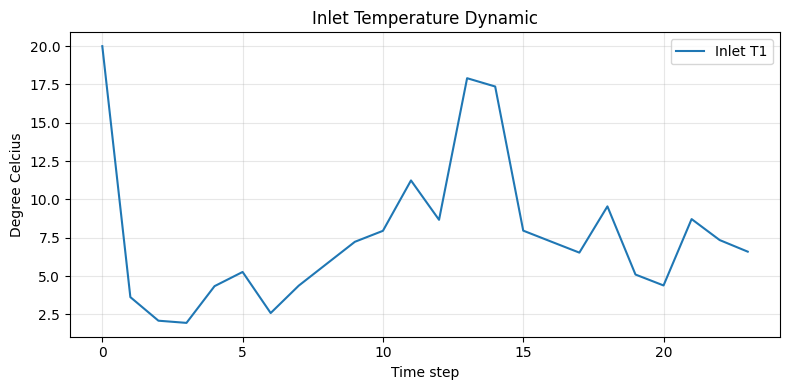

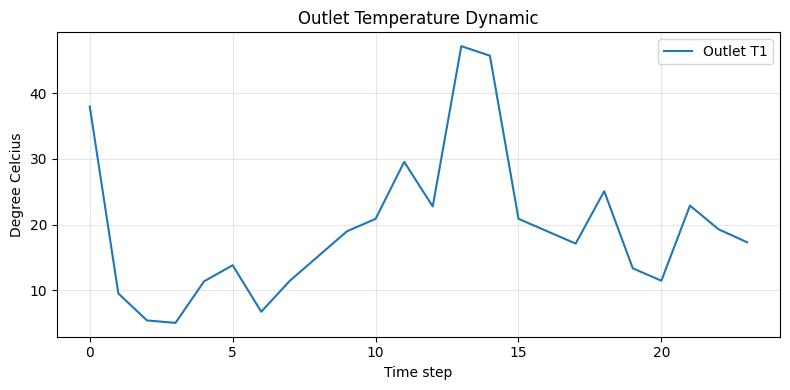

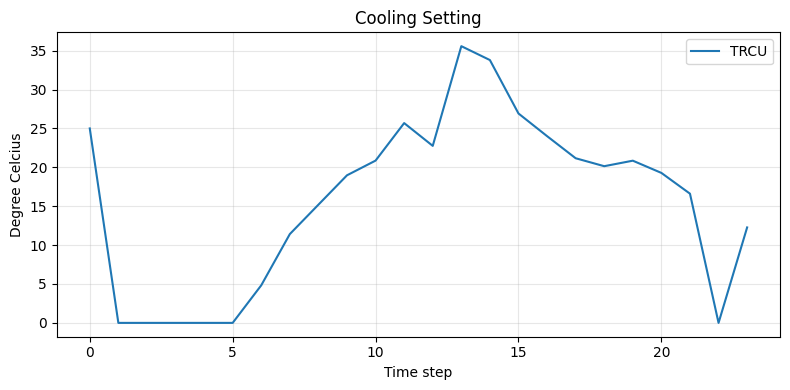

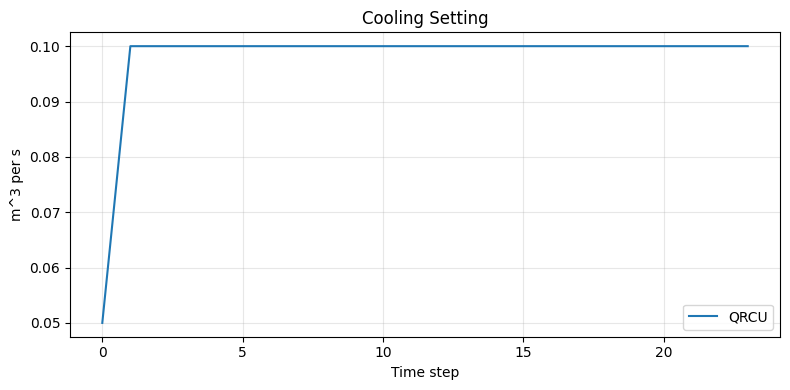

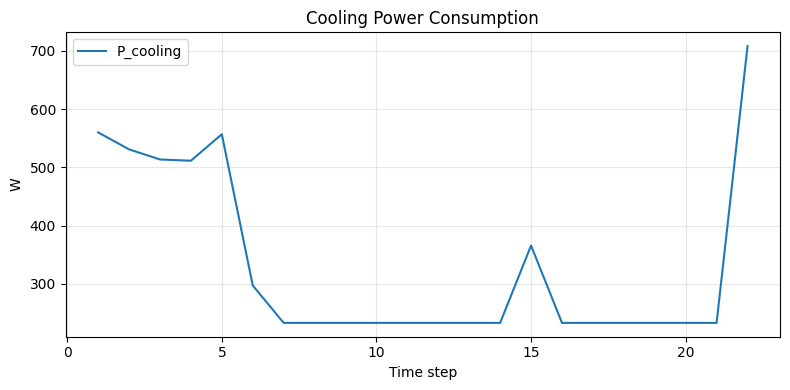

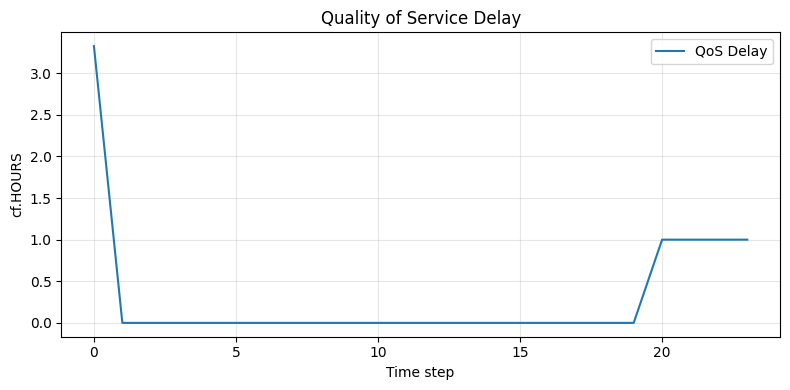

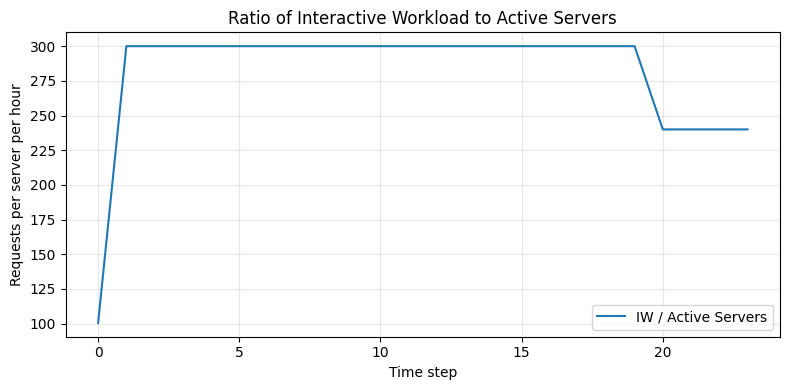

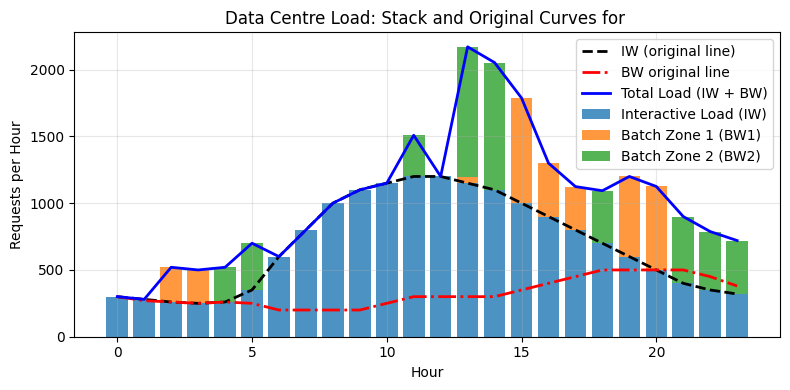

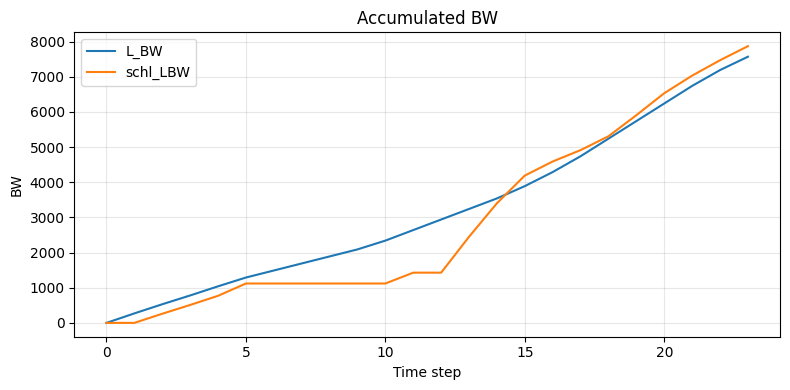

In [1]:
# 1. run a day ahead optimisation problem for economic objective
import MSc_stage1_cleaned as stage1
import numpy as np
import Monitored_file as mf

# 1.1 signel objective mode == 0
stage1.main()

# run single optimisation
if stage1.mode == 0:
    print("This is unioptimisation")
    stage1.plot()
    single_obj = stage1.Single_Obj
    single_e_cost = stage1.Single_Energy_Cost
    single_h_penalty = stage1.Single_Heat_Penalty

# run co-optimisation 
elif stage1.mode == 1:
    print("This is cooptimisation")
    stage1.plot()
    multi_obj = stage1.Multi_Obj
    multi_e_cost = stage1.Multi_Energy_Cost
    multi_h_penalty = stage1.Multi_Heat_Penalty



In [2]:
# numerical results
# print("uni-optimsiation objective: ", round(single_obj, 4))
# print("uni-optimsiation energy cost: ", round(single_e_cost, 4))
# print("uni-optimsiation heat penalty: ", round(single_h_penalty, 4))

# print("co-optimsiation objective: ",round(multi_obj, 4))
# print("co-optimsiation energy cost: ", round(multi_e_cost, 4))
# print("co-optimsiation heat penalty: ", round(multi_h_penalty, 4))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


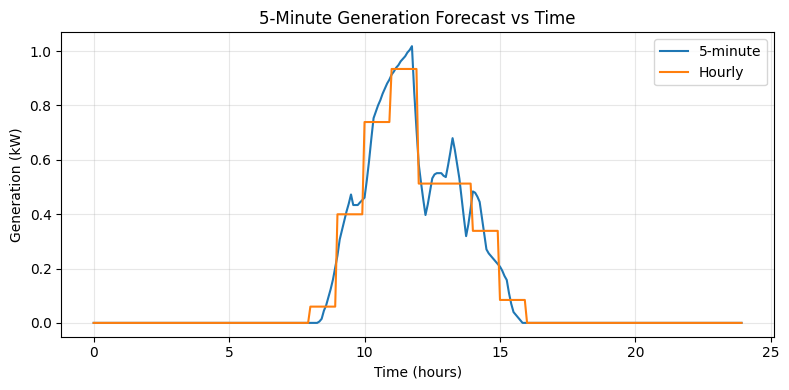

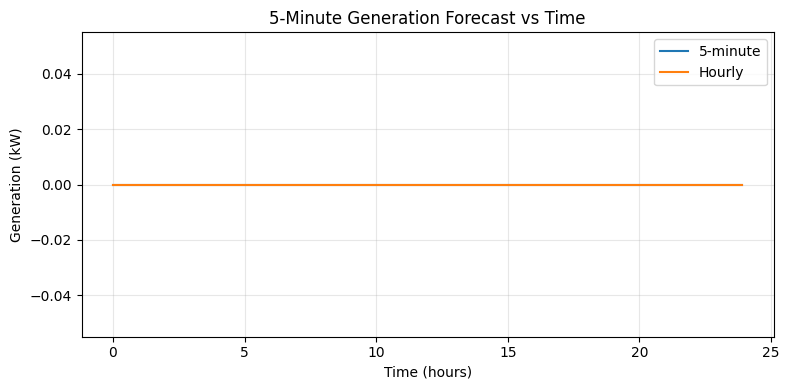

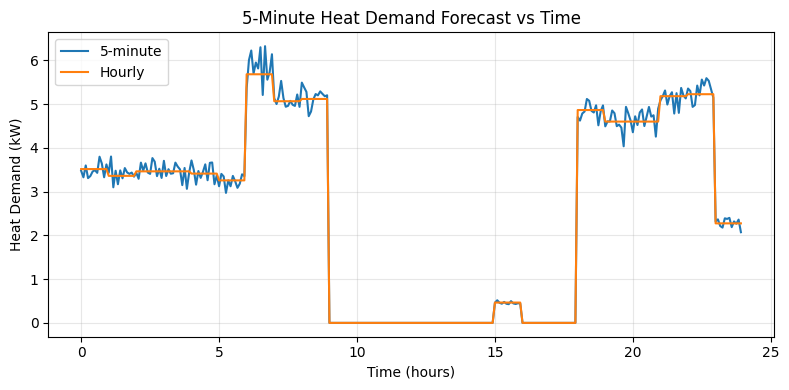

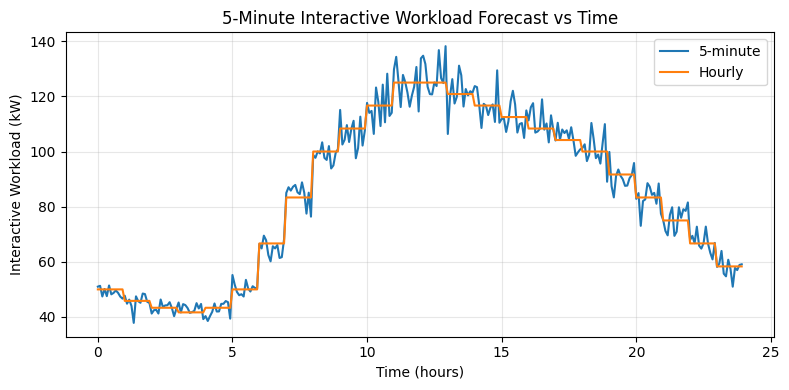

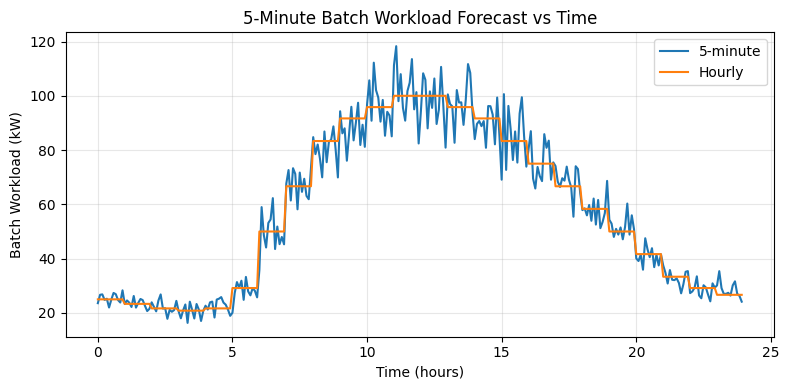

In [3]:
# 2. Run each shorter operation period for MPC to follow the optimal path provided the disturbance from the forecast deviation
# this is done in a loop until it completes for the whole day

import MSc_stage2_cleaned as stage2
stage2.initialise()


this is 2nd stage for Co-optimisation
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2712303
Academic license 2712303 - for non-commercial use only - registered to wl___@ed.ac.uk
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Set parameter InfUnbdInfo to value 1
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-14700, instruction set [SSE2|AVX|AVX2]
Thread count: 20 physical cores, 28 logical processors, using up to 28 threads

Non-default parameters:
InfUnbdInfo  1

Academic license 2712303 - for non-commercial use only - registered to wl___@ed.ac.uk
Optimize a model with 3163 rows, 1296 columns and 9508 nonzeros
Model fingerprint: 0xe203b0c7
Model has 94 quadratic constraints
Variable types: 1200 continuous, 96 integer (96 binary)
Coefficient statistics:
  Matrix range     [2e-04, 3e+02]
  QMatrix range    [6e+02, 6e+03]
  QLMatrix range   [1e+00, 3e+03]

<Figure size 640x480 with 0 Axes>

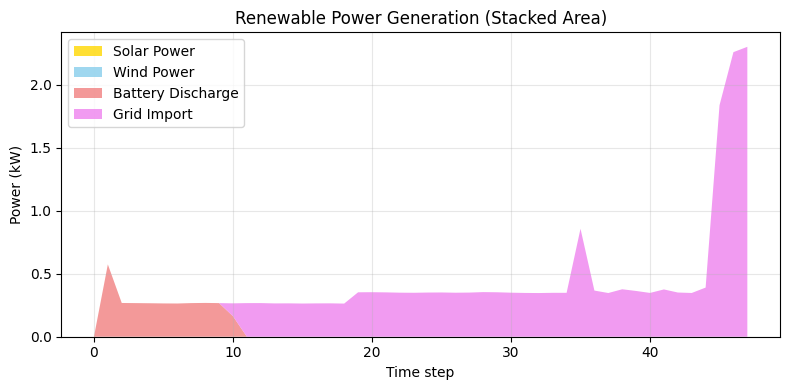

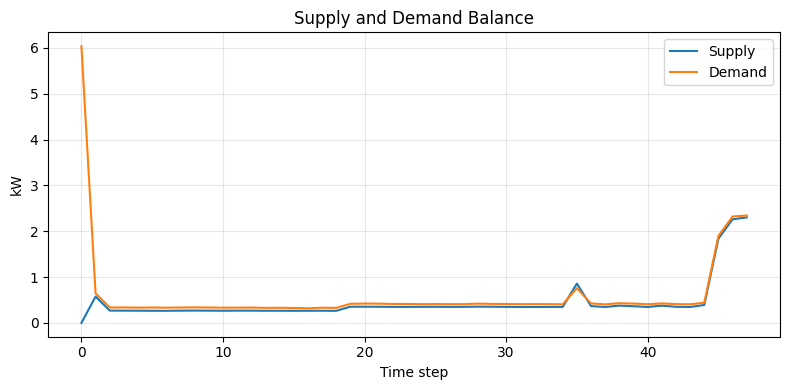

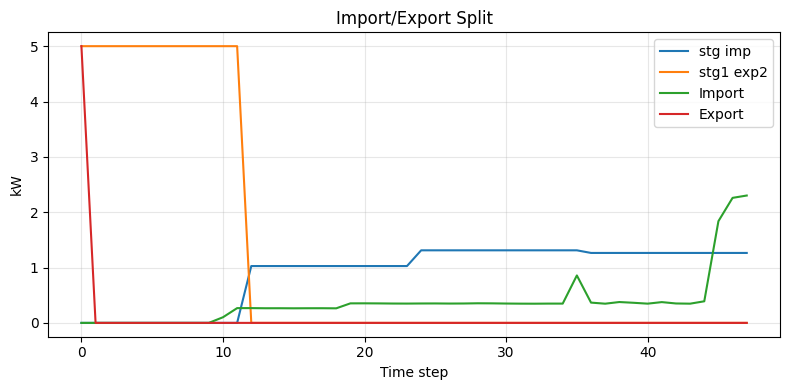

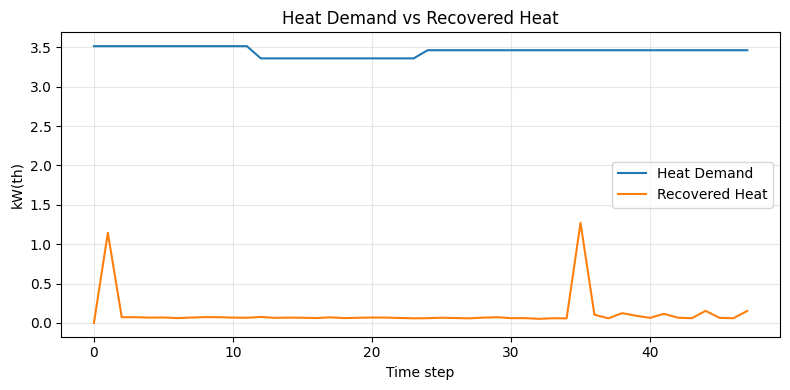

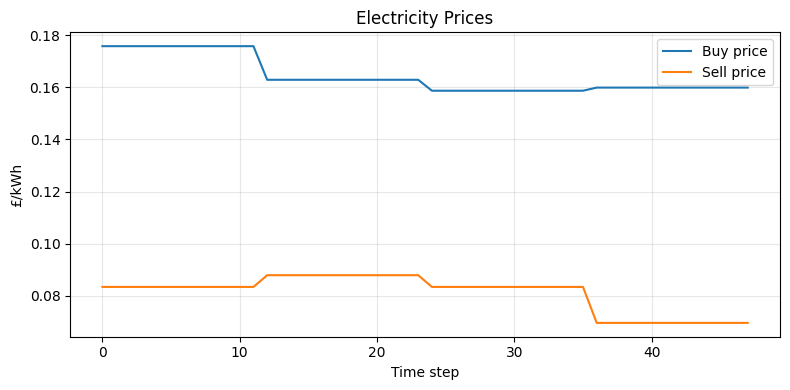

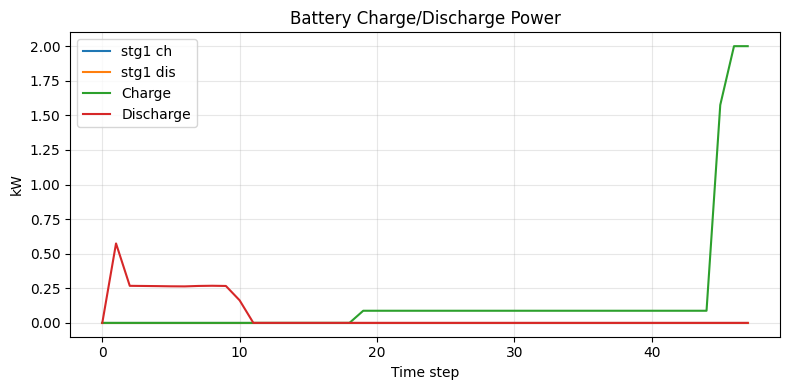

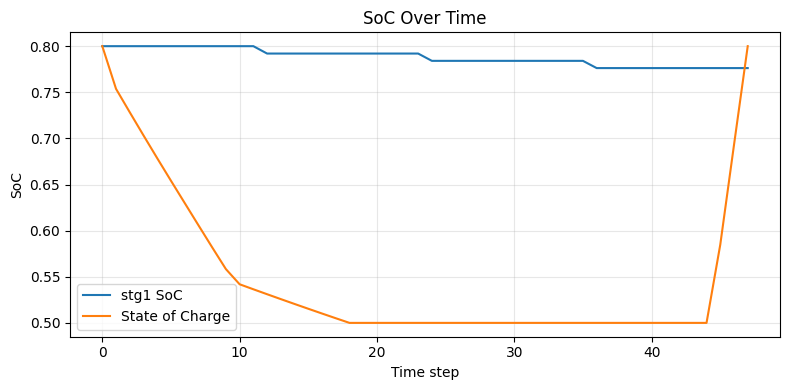

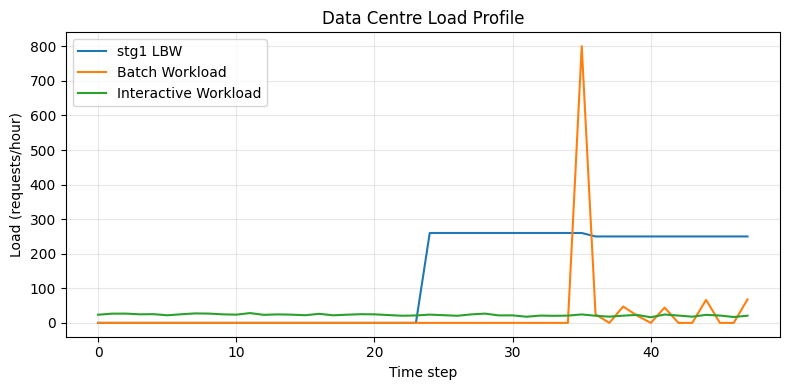

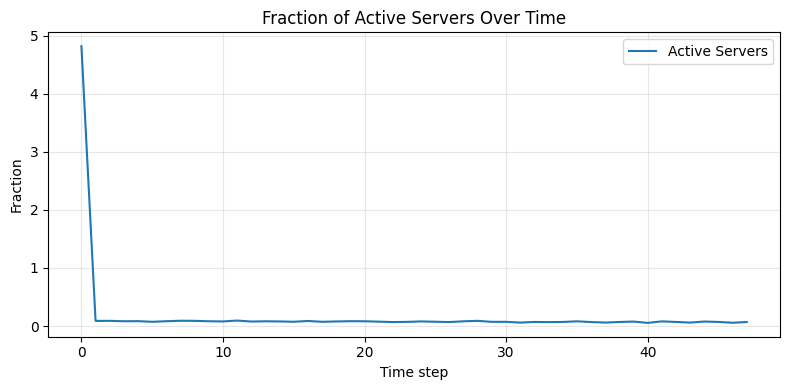

In [4]:
stage2.main()
stage2.plot()

In [5]:
stage2.iterate()
print(mf.CURRENT_HOUR)

for i in range(stage2.cf.STEP):
    stage2.main()
    stage2.iterate()

current hour: 0
next hour: 1
1


KeyError: 'key of type tuple not found and not a MultiIndex'